In [2]:
import numpy as np
import matplotlib.pyplot as plt

## K-Means

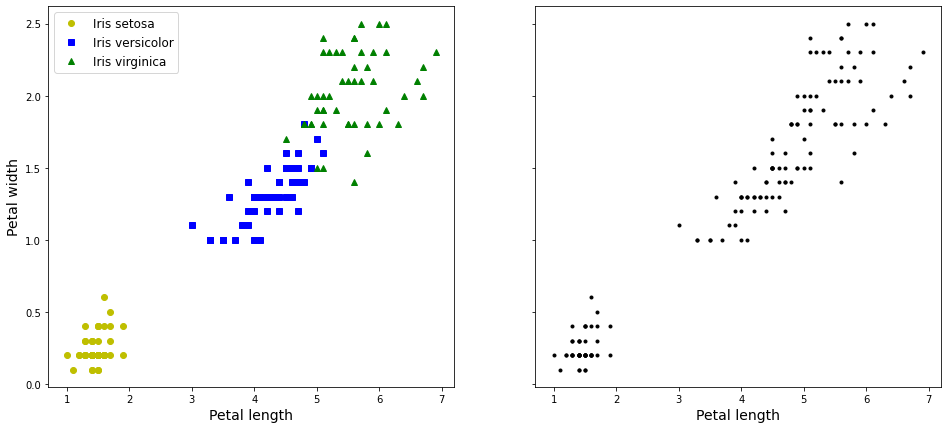

In [3]:
#from Hands on machine learning - A.Geron
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names
plt.figure(figsize=(16, 7))
plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)



In [37]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [96]:
def plot_clusters(X, color='royalblue'):
    plt.scatter(X[:, 0], X[:, 1], c=color, s=1)


def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    



In [132]:
class KMeans:
  def __init__(self,n_clusters=8,init='kmeans++',n_init=10,algorithm='full',max_iter=300,random_state=None):

    self.n_clusters=n_clusters
    self.init=init
    self.n_init=n_init
    self.algorithm=algorithm
    self.max_iter=max_iter
    self.random_state=random_state
    self.centroids=None
  
    
  def fit(self,X,verbose=False):

    self.X=X

    n_instances=self.X.shape[0]
    best_inertia=np.inf
    best_centroids=None
    
    for i in range(self.n_init): 

      centroids_idx=np.random.choice(n_instances, self.n_clusters,replace=False)
      centroids=X[centroids_idx].copy()
      #iterations:  
      for iter in range( self.max_iter):

        if verbose:
          print(f"Init nr: {i}, iteration:{iter}")

        #labeling instances
        distances=self.calc_distances(self.X,centroids)
        labels=np.argmin(distances,axis=1)
  
        #update centroids
        idx=0
        for centroid in centroids:
          indices=np.where( labels==idx ) # instances for each centroid
          centroids[idx]= np.average( X[indices],axis=0  )
          idx+=1
          


      current_inertia=self.calc_inertia(labels,centroids)
      if current_inertia < best_inertia:
        best_inertia=current_inertia
        best_centroids=centroids
        print("Best inertia changed")
        print("Best centroids:", best_centroids)

      self.centroids=best_centroids
      self.inertia=best_inertia 



  def calc_distances(self,X:np.ndarray,centroids: np.ndarray):

    distances=[]
    for x in X:
      distances.append(np.sqrt(np.sum( (centroids-x)**2 ,axis=1)) )

    return np.array(distances)



  def transform(self,X):
    return self.calc_distances(X,self.centroids)

  def predict(self,X:np.ndarray):
    
    distances=self.calc_distances(X,self.centroids) # matrix of distances to centroids for each row of X
    return np.argmin(distances, axis=1)


  def calc_inertia(self,labels,centroids):
    '''Calculates inertia, which is defined as mean distance of each x to its centroid '''

    distances=[]
    idx=0
    for instance in self.X:
      idx_of_centroid=labels[idx]
      centroid=centroids[idx_of_centroid]
      distances.append( np.sqrt (np.sum( (instance -centroid)**2) ) )
      idx+=1


    return np.average(distances )

    

  def silhouette_score():
    pass

In [81]:
kmeans=KMeans(n_clusters=5,max_iter=100)
kmeans.fit(X)

Best inertia changed
Best centroids: [[-2.80037642  1.30082566]
 [-1.46679593  2.28585348]
 [-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]]


In [82]:
centroids=kmeans.centroids
centroids

array([[-2.80037642,  1.30082566],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063]])

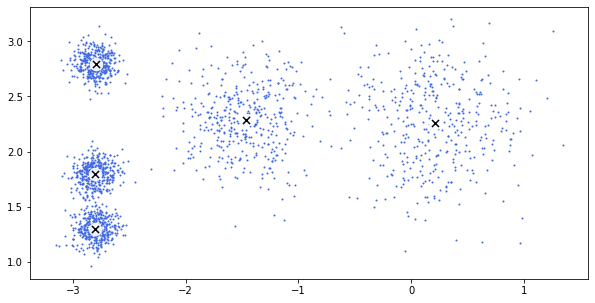

In [97]:
plt.figure(figsize=(10,5))
plot_clusters(X)
plot_centroids(centroids)


In [93]:
def plot_decision_boundaries(clusterer,X,resolution=1000):
  axis_1=( X[:,0].min(), X[:,0].max() ) 
  axis_2=( X[:,1].min(), X[:,1].max() ) 

  xx,yy=np.meshgrid(np.linspace(axis_1[0], axis_1[1],resolution ),
                    np.linspace(axis_2[0],axis_2[1],resolution )
                    )

  Z=clusterer.predict( np.c_[xx.ravel(), yy.ravel()]   )
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.4, cmap="Set1")
  plt.contour(Z, extent=(axis_1[0], axis_1[1], axis_2[0], axis_2[1]),linewidths=1, colors='k')

  



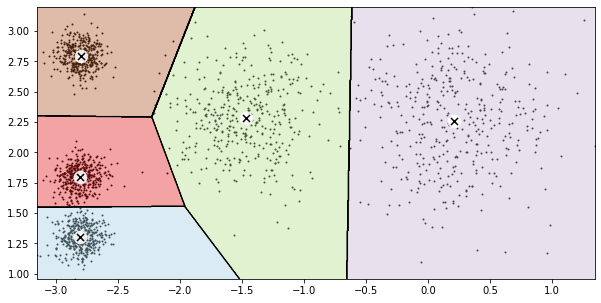

In [98]:
plt.figure(figsize=(10,5))
plot_clusters(X,color='black')
plot_centroids(centroids)
plot_decision_boundaries(kmeans,X)
